<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/AI-and-its-scientific-applications/blob/master/Time_series_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

--2021-02-12 14:25:00--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 479260 (468K) [text/plain]
Saving to: ‘time_series_covid19_confirmed_global.csv’

time_series_covid19 100%[===================>] 468.03K  --.-KB/s    in 0.04s   

2021-02-12 14:25:00 (12.8 MB/s) - ‘time_series_covid19_confirmed_global.csv’ saved [479260/479260]



In [1]:
import tensorflow as tf
import numpy as np
dataset=tf.data.Dataset.range(384)
dataset=dataset.window(5,shift=1,drop_remainder=True)
dataset=dataset.flat_map(lambda window:window.batch(5))
dataset=dataset.map(lambda window:(window[:-1],window[-1:]))
dataset=dataset.shuffle(buffer_size=10)
dataset=dataset.batch(1).prefetch(1)
x1=[]
y1=[]
for x,y in dataset:
  x1.append(x.numpy())
  y1.append(y.numpy())

In [3]:
np.array(x1).shape,np.array(y1).shape

((380, 1, 4), (380, 1, 1))

In [4]:
x1=np.array(x1).reshape(380,4)
y1=np.array(y1).reshape(380,1)

In [6]:
import pandas as pd
data=pd.read_csv("/content/time_series_covid19_confirmed_global.csv",delimiter=",")

In [7]:
timeseries=np.array(data[data["Country/Region"]=="India"])

In [12]:
timeseries=timeseries[0][4:]

In [13]:
len(timeseries)

387

In [15]:
x_train=[]
for i in x1:
  d=[]
  for j in i:
    d.append(timeseries[j])
  x_train.append(d)

In [17]:
y_train=[]
for i in y1:
  d=[]
  for j in i:
    d.append(timeseries[j])
  y_train.append(d)

In [18]:
len(x_train),len(y_train)

(380, 380)

In [19]:
x_train=np.array(x_train)
y_train=np.array(y_train)

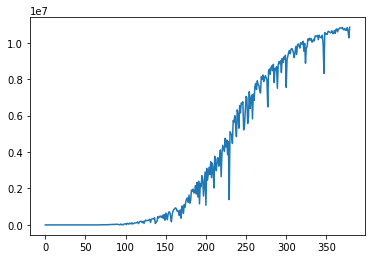

In [24]:
import matplotlib.pyplot as plt
plt.plot(y_train)

In [20]:
l0=tf.keras.layers.Dense(1,input_shape=[4])

In [21]:
model=tf.keras.models.Sequential([l0])

In [27]:
model.compile(loss="mse",optimizer=tf.keras.optimizers.SGD())

In [28]:
model.fit(x_train[:250],y_train[:250],epochs=10)

Epoch 1/10
8/8 [==============================] - 0s 2ms/step - loss: nan
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: nan
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: nan
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: nan
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: nan
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: nan
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: nan
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: nan
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: nan
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: nan


In [59]:
l0.get_weights()

[array([[nan],
        [nan],
        [nan],
        [nan]], dtype=float32), array([nan], dtype=float32)]

In [67]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[4], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-10000, momentum=0.9))
history=model.fit(x_train,y_train,epochs=100,verbose=0)

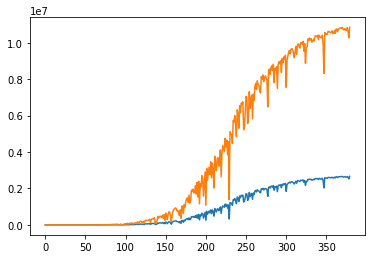

In [70]:
plt.plot(model.predict(x_train))
plt.plot(y_train)

In [77]:
error=[]
i=[0,1,2,3,4,5,6,7]
for j in i:
  ex=10**j
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[4], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
  ])
  model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-10**j, momentum=1))
  history=model.fit(x_train,y_train,epochs=100,verbose=0)
  error.append(np.sum(model.predict(x_train)-y_train))

In [78]:
error

[nan,
 nan,
 -1497789876.4277031,
 -464055681.66549057,
 -3183352829.9109025,
 -256983854.6297494,
 -2884228600.9986973,
 -2489372665.2093415]

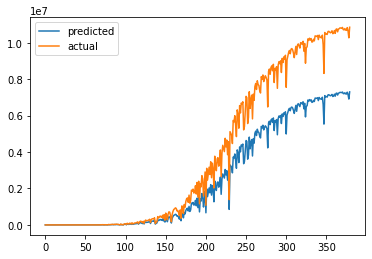

In [80]:
plt.plot(-model.predict(x_train),label="predicted")
plt.plot(y_train,label="actual")
plt.legend()